In [17]:
import numpy as np
import pandas as pd

In [18]:
# Load the data into a pandas dataframe
data = pd.read_csv('bigdata/dest.csv')
data = data.dropna()

# Get the column names that start with "food"
food_cols = [col for col in data.columns if col.startswith('Food')]
dest_cols = ['destination_id', 'destination_type_id', 'destination_latitude', 'destination_longitude']

# Create a new DataFrame with only the extracted columns
food_data  = data[food_cols + dest_cols]
food_data

,Food_Bars,Food_Beer,Food_Cafes,Food_Cocktails,Food_Coffee,Food_Dining,Food_Fine_Dining,Food_Food,Food_Restaurants,Food_Seafood,Food_Wineries,destination_id,destination_type_id,destination_latitude,destination_longitude
0,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,7997,557,36.913930,7.741176
1,-2.075407,-2.224164,-2.224164,-2.224164,-2.153316,-1.910270,-2.197327,-1.903782,-1.975081,-2.224164,-2.224164,8090,557,24.231660,55.740160
2,-2.115485,-2.177409,-2.177409,-2.177409,-2.177409,-2.101291,-2.177409,-2.177409,-2.101291,-2.177409,-2.177409,8121,557,44.942840,37.292920
3,-2.056618,-2.194008,-2.185526,-2.194008,-2.130263,-1.946523,-2.194008,-2.092435,-1.964288,-2.194008,-2.194008,8152,464,56.153090,10.205722
4,-2.030768,-2.182411,-2.198622,-2.182794,-2.022664,-1.809095,-2.201047,-2.002542,-1.867491,-2.201047,-2.201047,8369,464,32.412406,-99.764760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,-1.939812,-2.205869,-2.205869,-2.183245,-2.171785,-1.850261,-2.205869,-1.894180,-1.891250,-2.205869,-2.205869,196564892,557,37.455970,25.331130
36403,-2.102505,-2.204130,-2.145876,-2.216621,-2.106619,-1.905899,-2.216621,-1.970717,-1.957755,-2.216621,-2.216621,196564923,774,35.085540,-89.780590
36404,-2.176802,-2.177508,-2.203479,-2.203479,-1.880075,-1.765911,-2.203479,-2.003886,-1.834853,-2.203479,-2.203479,196564954,774,35.139600,-90.002950
36405,-2.135493,-2.208308,-2.208308,-2.208308,-1.965320,-1.766581,-2.208308,-1.771562,-1.787888,-2.208308,-2.208308,196564985,774,41.381570,-82.566290


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Filter the data to include only destination_type_id = 464 or 557
data = data[(data['destination_type_id'] == 464) | (data['destination_type_id'] == 557)]

# Create the feature matrix and target vector
X = data[['Food_Bars', 'Food_Beer', 'Food_Cafes', 'Food_Cocktails', 'Food_Coffee', 'Food_Dining', 'Food_Fine_Dining', 'Food_Food', 'Food_Restaurants', 'Food_Seafood', 'Food_Wineries','Activity_Adventure','Entertainment_Aquarium','Culture_Archaeology','Culture_Architecture','Culture_Art','Food_Bars','Sports_Baseball','Sports_Basketball','Nature_Beach','Food_Beer','Activity_Biking','Activity_Birdwatching','Activity_Boating','Business_Budget','Business_Business','Food_Cafes','Activity_Camping','Entertainment_Casino','Culture_Castle','Culture_Cathedral','Activity_Cave_Exploring','Culture_Chinatown','Culture_Churches','Food_Cocktails','Food_Coffee','Business_Conferences','Nature_Coral_Reefs','Nature_Countryside','Sports_Cross_Country_Skiing','Culture_Culture','Activity_Dancing','Nature_Desert','Food_Dining','Activity_Diving','Activity_Ecotourism','Entertainment_Entertainment','Activity_Excursions','Entertainment_Family_Friendly','Activity_Ferry','Culture_Festivals','Food_Fine_Dining','Activity_Fishing','Food_Food','Sports_Football','Nature_Forests','Culture_Friendly_People','Nature_Gardens','Nature_Glaciers','Sports_Golf','Nature_Hiking','Nature_Hilly','Culture_Historical','Sports_Hockey','Activity_Horseracing','Activity_Horseback_Riding','Nature_Hotsprings','Activity_Hunting','Activity_Iceskating','Sports_Indoor_Skiing','Nature_Islands','Entertainment_Jazz','Nature_Jungle','Activity_Kayaking','Activity_Kitesurfing','Nature_Lake','Entertainment_Live_Music','Culture_Luxury','Culture_Marina','Culture_Markets','Culture_Monuments','Nature_Mountains','Culture_Museums','Entertainment_Musicals','Nature_Natural_Parks','Nature_Nature','Entertainment_Nightclubs','Entertainment_Nightlife','Nature_Northern_lights','Entertainment_Opera','Business_Port','Activity_Rafting','Nature_Rainforest','Culture_Relaxing','Business_Resorts','Food_Restaurants','Nature_River','Activity_Rockclimbing','Culture_Romantic','Activity_Rowing','Culture_Ruins','Sports_Running','Nature_Safari','Activity_Sailing','Nature_Scenery','Nature_Sea','Food_Seafood','Culture_Secluded','Activity_Segway_Tours','Nature_Sharks','Activity_Shopping','Activity_Sightseeing','Sports_Skiing','Activity_Skydiving','Nature_Skyscrapers','Activity_Sledding','Culture_Smalltown','Activity_Snorkeling','Activity_Snowtubing','Sports_Snowboarding','Activity_Snowmobile_Riding','Activity_Snowshoeing','Sports_Soccer','Culture_Spas','Sports_Sports','Activity_Stargazing','Nature_Sunnyweather','Nature_Sunrise','Nature_Sunsets','Activity_Surfing','Activity_Swimming','Culture_Temples','Entertainment_Theater','Entertainment_Themepark','Entertainment_Tours','Culture_Trendy','Nature_Tropical','Culture_Unescosite','Business_University','Culture_Urban','Nature_Volcanoes','Activity_Walking','Activity_Waterskiing','Nature_Waterfalls','Entertainment_Waterparks','Activity_Whalewatching','Nature_Wildlife','Activity_Windsurfing','Food_Wineries','Entertainment_Zoo']]
y = data['destination_type_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

# print coefficients and intercept
print("Coefficients: ", coef)
print("Intercept: ", intercept)

Accuracy: 0.8232106570331903
Coefficients:  [[ 7.80772604e-02  1.11674945e+00  4.82372826e-01  1.92424968e-01
   2.86957192e-01 -5.29622810e-01  3.91550705e-01  1.03746290e+00
  -7.33740149e-01  3.13441343e-01  4.23364304e-02 -7.71910477e-01
   6.57004965e-01 -5.38102527e-01  8.38939864e-01  7.10238171e-01
   7.80772604e-02  5.15030945e-01  1.72952268e+00  1.97717171e-01
   1.11674945e+00 -1.60020249e+00  9.15531007e-02 -5.01472465e-01
  -6.53794032e-01 -2.17901618e+00  4.82372826e-01  2.81750552e-01
  -9.28149773e-01 -1.16620929e+00 -9.99645938e-01  9.39322688e-02
   5.56593340e-01 -1.78934684e+00  1.92424968e-01  2.86957192e-01
   9.13600181e-01 -5.18452657e-01 -2.42478700e+00 -6.88465041e-01
  -6.38430831e-01  4.45844676e-01  7.17802079e-01 -5.29622810e-01
  -4.85068602e-01 -2.85926378e-01  2.06070994e-01 -6.40397299e-01
   9.18270691e-01 -2.08500186e-01 -4.08815642e-01  3.91550705e-01
   6.29040867e-01  1.03746290e+00 -6.03984306e-02 -1.09149453e+00
   5.91959473e-01  8.45180217e-0

/rhome/ssaxe015/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  41  730]
 [  53 3605]]


Text(0.5, 1.0, 'Confusion Matrix for\xa0logistic regression with all variables')

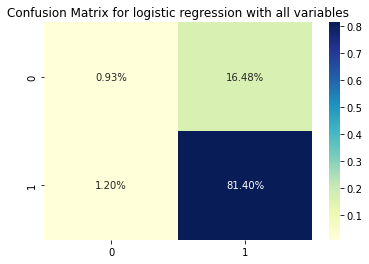

In [20]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='YlGnBu')
plt.gca().set_title("Confusion Matrix for logistic regression with all variables")

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         464       0.44      0.05      0.09       771
         557       0.83      0.99      0.90      3658

    accuracy                           0.82      4429
   macro avg       0.63      0.52      0.50      4429
weighted avg       0.76      0.82      0.76      4429



In [87]:
# Drop rows with missing values in food_data
food_data = food_data.dropna()

In [6]:
from sklearn.model_selection import train_test_split

# Divide the data into training and test datasets
food_train, food_test = train_test_split(food_data, test_size=0.3, random_state=42)

In [7]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit the model
model1 = sm.formula.glm(
    formula='destination_type_id ~ Food_Bars + Food_Beer + Food_Cafes + Food_Cocktails + Food_Coffee + Food_Dining + Food_Food + Food_Restaurants + Food_Seafood + Food_Wineries',
    data=food_train,
    family=sm.families.Binomial()
).fit()

# Print the model summary
print(model1.summary())

# Make predictions on the test data
pred_full1 = model1.predict(food_test)

# Compute accuracy metrics
accuracy = pred_full1.mean()
std_dev = pred_full1.std()
print(f"Accuracy: {accuracy} (+/- {std_dev})")

                  Generalized Linear Model Regression Results                  
Dep. Variable:     destination_type_id   No. Observations:                25484
Model:                             GLM   Df Residuals:                    25473
Model Family:                 Binomial   Df Model:                           10
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                   -inf
Date:                 Wed, 15 Mar 2023   Deviance:                   1.3961e+09
Time:                         15:07:12   Pearson chi2:                 4.86e+25
No. Iterations:                      2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.225e+19   

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
data = food_data

# Filter the data to include only destination_type_id = 464 or 557
data = data[(data['destination_type_id'] == 464) | (data['destination_type_id'] == 557)]

# Create the feature matrix and target vector
X = data[['Food_Bars', 'Food_Beer', 'Food_Cafes', 'Food_Cocktails', 'Food_Coffee', 'Food_Dining', 'Food_Fine_Dining', 'Food_Food', 'Food_Restaurants', 'Food_Seafood', 'Food_Wineries']]
y = data['destination_type_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

# print coefficients and intercept
print("Coefficients: ", coef)
print("Intercept: ", intercept)

Accuracy: 0.8243395800406412
Coefficients:  [[-0.4338403   0.51697268  0.54506893 -0.20547846  1.40434065 -1.49440309
  -0.35195377  2.26495388 -1.7912743   0.11619561 -0.64812407]]
Intercept:  [1.7880198]


/rhome/ssaxe015/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[   0  771]
 [   7 3651]]


Text(0.5, 1.0, 'Confusion Matrix for\xa0logistic regression with all the variables of category food')

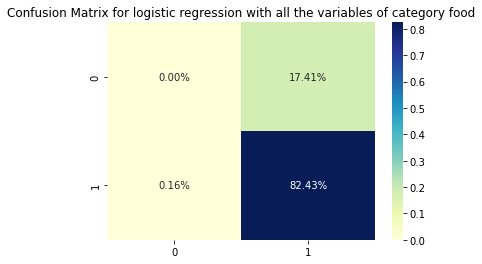

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='YlGnBu')
plt.gca().set_title("Confusion Matrix for logistic regression with all the variables of category food")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         464       0.00      0.00      0.00       771
         557       0.83      1.00      0.90      3658

    accuracy                           0.82      4429
   macro avg       0.41      0.50      0.45      4429
weighted avg       0.68      0.82      0.75      4429



In [11]:
import statsmodels.api as sm

# Create binary dependent variables for each category separately
y_train_binary_464 = (y_train == 464).astype(int)
y_train_binary_557 = (y_train == 557).astype(int)

# Fit the logistic regression model for 464 destination type ID using statsmodels
logit_model_464 = sm.Logit(y_train_binary_464, X_train)
result_464 = logit_model_464.fit()

# Print the summary of the model
print("Results for Destination Type ID 464:")
print(result_464.summary())

# Fit the logistic regression model for 557 destination type ID using statsmodels
logit_model_557 = sm.Logit(y_train_binary_557, X_train)
result_557 = logit_model_557.fit()

# Print the summary of the model
print("Results for Destination Type ID 557:")
print(result_557.summary())

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

# print coefficients and intercept
print("Coefficients: ", coef)
print("Intercept: ", intercept)

Optimization terminated successfully.
         Current function value: 0.453351
         Iterations 6
Results for Destination Type ID 464:
                            Logit Regression Results                           
Dep. Variable:     destination_type_id   No. Observations:                10333
Model:                           Logit   Df Residuals:                    10322
Method:                            MLE   Df Model:                           10
Date:                 Wed, 15 Mar 2023   Pseudo R-squ.:                 0.02731
Time:                         15:07:58   Log-Likelihood:                -4684.5
converged:                        True   LL-Null:                       -4816.0
Covariance Type:             nonrobust   LLR p-value:                 9.891e-51
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Food_Bars            0.5811      0.312      1.860  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the CSV file into a pandas DataFrame
df = pd.read_csv('Dest_Culture.csv')

# Select the culture columns to plot
culture_columns = df.columns[df.columns.str.startswith('Culture_')]

# Create a histogram for each culture column
fig, ax = plt.subplots(figsize=(10, 6))
for column in culture_columns:
    ax.hist(df[column], bins=30, alpha=0.5, label=column)

# Set the x and y axis labels and title
ax.set_xlabel('Culture Score')
ax.set_ylabel('Number of Destinations')
ax.set_title('Histogram of Culture Scores')

# Add a legend
ax.legend()

# Show the plot
plt.show()